<center><h1><b>Basic EDA</b></h1></center>

In [19]:

%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import math

#  I. Loading and display basic information

In [20]:
NUMERICAL_COLS = ['Year', 'Month', 'MainLandfallLocation', 'Flood', 'Slide',
                  'OFDAResponse', 'Appeal', 'Declaration', 'LandfallMagnitude(kph)',
                  'LandfallPressure(mb)', 'TotalDeaths', 'NoInjured','TotalDamage(000US$)', 
                  'TotalDamageAdjusted(000US$)']

In [21]:
# load file
DATA_HEAD = Path("data")
file_name = "STORM_RAW_0.3.csv"
target_file =  DATA_HEAD / file_name
df = pd.read_csv(target_file)

# 5 random sample of data
df.sample(5)

,ID,EventName,Year,Month,DisasterType,DisasterSubtype,MainLandfallLocation,Flood,Slide,OFDAResponse,Appeal,Declaration,LandfallMagnitude(kph),LandfallPressure(mb),TotalDeaths,NoInjured,TotalDamage(000US$),TotalDamageAdjusted(000US$),CPI
51,STORM_CHUCK_1992,Chuck,1992,6.0,Storm,Tropical cyclone,3,0.0,0.0,0.0,0.0,0.0,102.0,965.0,94.0,11.0,400.0,834.0,54.85
3,STORM_JOAN_1964,Joan,1964,11.0,Storm,Tropical cyclone,5,NaN,NaN,NaN,NaN,NaN,130.0,980.0,2500.0,NaN,15000.0,NaN,10.60
71,STORM_CHIP_1998,Chip,1998,11.0,Storm,Tropical cyclone,7,0.0,0.0,1.0,1.0,0.0,92.0,994.0,17.0,NaN,923.0,1657.0,64.54
142,STORM_MIRINAE_2016,Mirinae,2016,7.0,Storm,Tropical cyclone,3,0.0,0.0,0.0,0.0,0.0,92.0,985.0,3.0,5.0,191000.0,232897.0,85.80
19,STORM_VERA_1983,Vera,1983,7.0,Storm,Tropical cyclone,1,1.0,0.0,NaN,NaN,NaN,101.0,980.0,106.0,NaN,NaN,NaN,35.50


In [22]:
# info about dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           186 non-null    object 
 1   EventName                    163 non-null    object 
 2   Year                         186 non-null    int64  
 3   Month                        184 non-null    float64
 4   DisasterType                 177 non-null    object 
 5   DisasterSubtype              184 non-null    object 
 6   MainLandfallLocation         186 non-null    int64  
 7   Flood                        176 non-null    float64
 8   Slide                        171 non-null    float64
 9   OFDAResponse                 126 non-null    float64
 10  Appeal                       125 non-null    float64
 11  Declaration                  125 non-null    float64
 12  LandfallMagnitude(kph)       158 non-null    float64
 13  LandfallPressure(mb)

# Handling NaN Values
- Numerical columns related to intensity and damage (such as `LandfallMagnitude(kph)`, `TotalDamage(000US$)`): *Fill with mean value*: These values can be filled with the column average, as it's a safe approach to retain information without distorting the data.

- Columns related to response and relief declarations (such as `OFDAResponse`, `Appeal`, `Declaration`): *Fill with 0*: If an event has no data on response or declaration, we can assume by default that no response or declaration was made.

- EventName and `DisasterType`/`DisasterSubtype` columns: *Skip*: These are non-essential columns with **string** data type, so they don't need to be processed.

- Time and geographical columns (such as `Year`, `MainLandfallLocation`) *have no missing values*, so they don't need to be processed.

In [23]:
def convert_dtype(df ,target_dtype, target_cols):
    for col in target_cols:
        df[col] = df[col].astype(target_dtype)

    return df

# 1. Fill with mean to:
numerical_columns = ['LandfallMagnitude(kph)', 'LandfallPressure(mb)', 'TotalDeaths', 
                     'NoInjured', 'TotalDamage(000US$)', 'TotalDamageAdjusted(000US$)', 'CPI']
df[numerical_columns] = df[numerical_columns].fillna(round(df[numerical_columns].mean(),0))

# 2. Fill with 0 to
response_columns = ['OFDAResponse', 'Appeal', 'Declaration']
df[response_columns] = df[response_columns].fillna(0)
df = convert_dtype(df, "Int64", NUMERICAL_COLS)
# Xem lại dữ liệu sau khi xử lý
df.isnull().sum()

ID                              0
EventName                      23
Year                            0
Month                           2
DisasterType                    9
DisasterSubtype                 2
MainLandfallLocation            0
Flood                          10
Slide                          15
OFDAResponse                    0
Appeal                          0
Declaration                     0
LandfallMagnitude(kph)          0
LandfallPressure(mb)            0
TotalDeaths                     0
NoInjured                       0
TotalDamage(000US$)             0
TotalDamageAdjusted(000US$)     0
CPI                             0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           186 non-null    object 
 1   EventName                    163 non-null    object 
 2   Year                         186 non-null    Int64  
 3   Month                        184 non-null    Int64  
 4   DisasterType                 177 non-null    object 
 5   DisasterSubtype              184 non-null    object 
 6   MainLandfallLocation         186 non-null    Int64  
 7   Flood                        176 non-null    Int64  
 8   Slide                        171 non-null    Int64  
 9   OFDAResponse                 186 non-null    Int64  
 10  Appeal                       186 non-null    Int64  
 11  Declaration                  186 non-null    Int64  
 12  LandfallMagnitude(kph)       186 non-null    Int64  
 13  LandfallPressure(mb)

In [25]:
# Shape of data
df.shape

(186, 19)

In [26]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,Year,Month,MainLandfallLocation,Flood,Slide,OFDAResponse,Appeal,Declaration,LandfallMagnitude(kph),LandfallPressure(mb),TotalDeaths,NoInjured,TotalDamage(000US$),TotalDamageAdjusted(000US$),CPI
count,186.0,184.0,186.0,176.0,171.0,186.0,186.0,186.0,186.0,186.0,186.0,186.0,186.0,186.0,186.000000
mean,2001.688172,8.76087,4.268817,0.380682,0.152047,0.05914,0.021505,0.0,92.715054,984.865591,122.241935,144.908602,89118.655914,147206.0,63.860538
std,14.916328,2.090152,1.715681,0.48694,0.360121,0.236523,0.145453,0.0,35.555963,14.973786,502.224361,243.457454,155430.275748,199402.127877,20.259272
min,1953.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,925.0,0.0,0.0,0.0,0.0,9.160000
25%,1990.25,7.0,3.0,0.0,0.0,0.0,0.0,0.0,65.0,980.0,6.0,16.25,6275.0,17451.0,53.600000
50%,2004.5,9.0,4.0,0.0,0.0,0.0,0.0,0.0,93.0,985.0,20.0,145.0,46550.0,147206.0,64.000000
75%,2014.0,10.25,5.0,1.0,0.0,0.0,0.0,0.0,111.0,996.0,95.75,145.0,89119.0,147206.0,79.600000
max,2023.0,12.0,11.0,1.0,1.0,1.0,1.0,0.0,176.0,1010.0,5100.0,2502.0,1000000.0,1193926.0,100.000000


After loading the data and examining the basic information:

- There are both `numerical` and `categorical` columns in the dataset.
- Size: `186 x 19`

# II. Visualizing basic view of data

### 1. Distribution

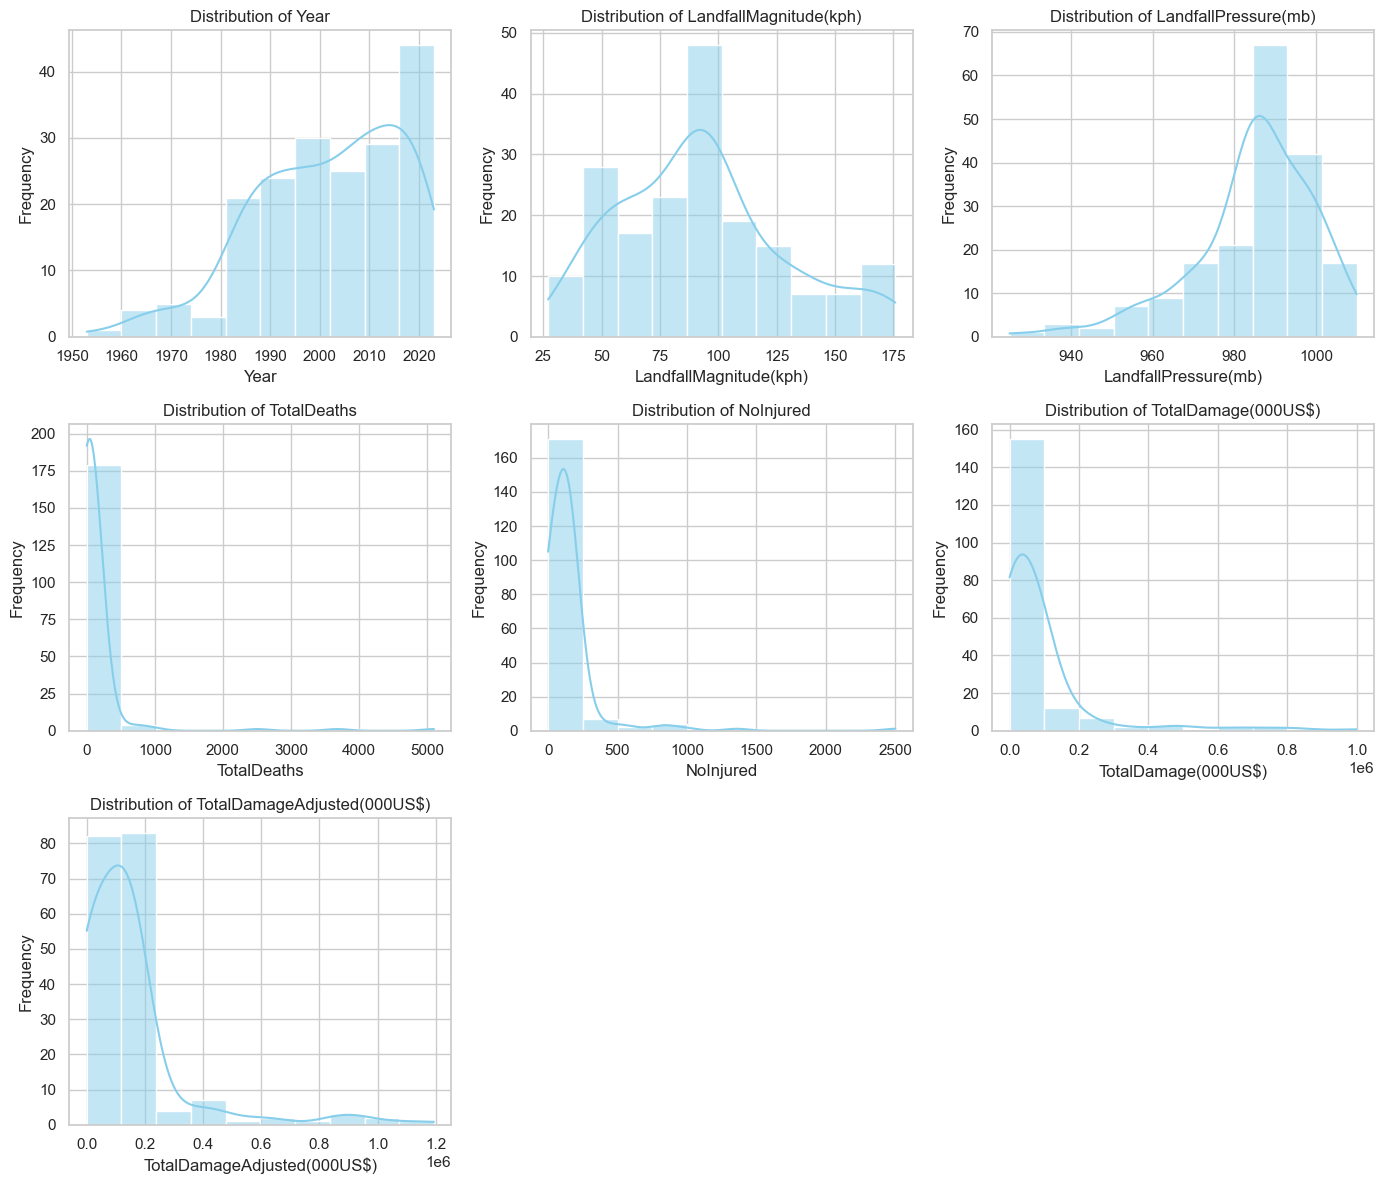

In [28]:

def cal_subplot_size(columns:list[str]):
    n = len(columns)
    nrows = math.ceil(math.sqrt(n))
    ncols = math.ceil(n/nrows)
    return nrows, ncols

def plot_distributions(df, columns_to_plot, plot_type='boxplot', figsize=(14, 12)):
    # Calculate the number of rows and columns needed
    nrows, ncols = cal_subplot_size(columns=columns_to_plot)
    
    # Set up the visual style
    sns.set_theme(style="whitegrid")

    # Create subplots
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)

    # Plotting each column
    for ax, col in zip(axs.ravel(), columns_to_plot):
        if plot_type == 'boxplot':
            sns.boxplot(x=df[col], ax=ax, color='coral')
            ax.set_ylabel('Value')
        elif plot_type == 'histplot':
            sns.histplot(df[col], kde=True, ax=ax, bins=10, color='skyblue')
            ax.set_ylabel('Frequency')
        
        ax.set_title(f'Distribution of {col}', fontsize=12)
        ax.set_xlabel(col)

    # Remove any empty subplots
    for i in range(len(columns_to_plot), nrows * ncols):
        fig.delaxes(axs.ravel()[i])

    plt.tight_layout()
    plt.show()

columns_to_plot = ['Year' ,'LandfallMagnitude(kph)', 'LandfallPressure(mb)', 
                   'TotalDeaths', 'NoInjured', 'TotalDamage(000US$)', 
                   'TotalDamageAdjusted(000US$)']

plot_distributions(df, columns_to_plot, plot_type='histplot')

The histograms reveal several insights about the data distribution:

- `Year`: The data spans from the `1950s to recent years`, with more frequent recordings in recent decades.
- `Landfall Magnitude`: Most storms have magnitudes `between 50-150 kph`, with a `few extreme cases`.
- `Landfall Pressure`: The pressure distribution appears somewhat normal, `centered around 980-990 mb`.
- `Total Deaths`: `Highly right-skewed`, indicating most storms cause relatively few deaths, but there are `some catastrophic events`.
- `Number of Injured`: Also `right-skewed`, following a `similar pattern to deaths`.
- `Total Damage`: `Extremely right-skewed`, suggesting most storms cause moderate damage, but some result in extreme financial losses.
- `Total Damage Adjusted`: `Similar to Total Damage`, but with `even more extreme right-skew`, possibly due to inflation adjustment.

### 2. Noise

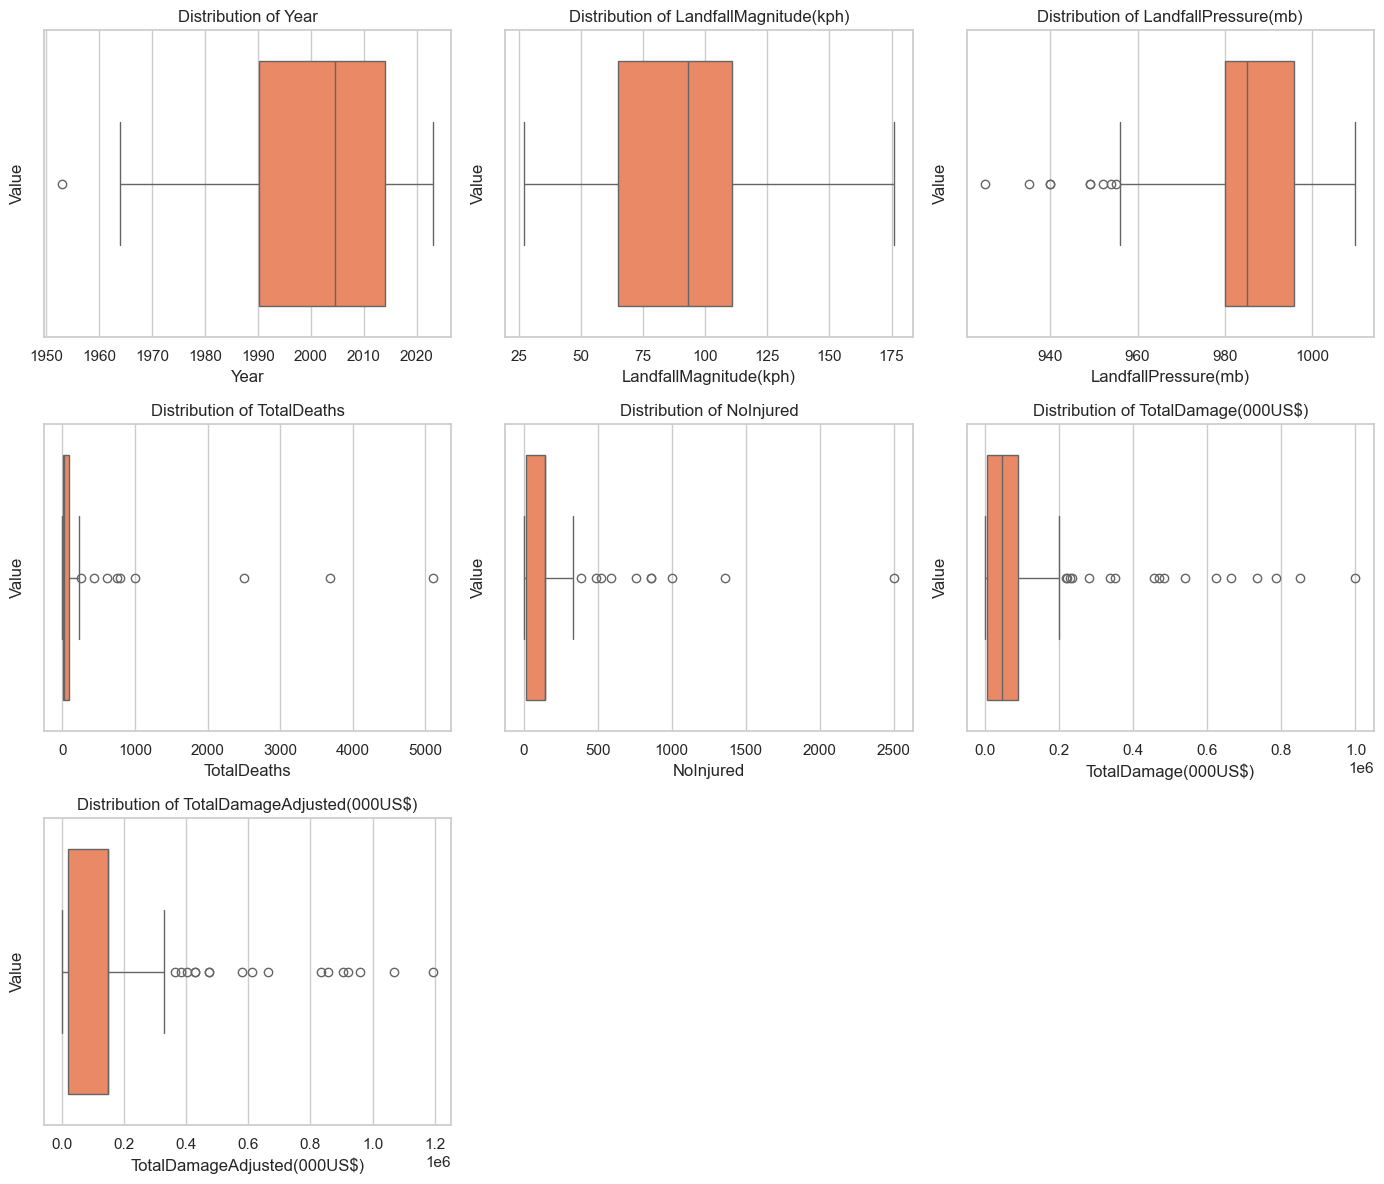

In [29]:
plot_distributions(df, columns_to_plot, plot_type='boxplot')

The boxplots provide insights into the data's spread and potential outliers:

- `Year`: Shows a gradual increase over time, with some outliers in earlier years.
- `Landfall Magnitude`: `Relatively symmetrical distribution` with some `high-magnitude outliers`.
- `Landfall Pressure`: `Fairly symmetrical`, with few outliers.
- `Total Deaths`: `Highly skewed with many outliers on the high end`, indicating rare but devastating events.
- `Number of Injured`: Similar pattern to Total Deaths, but with even `more extreme outliers`.
- `Total Damage and Adjusted Damage`: Both show `extreme skewness and numerous high-value outliers`, suggesting a few storms cause disproportionate damage.


### 3. Correlation between attributes

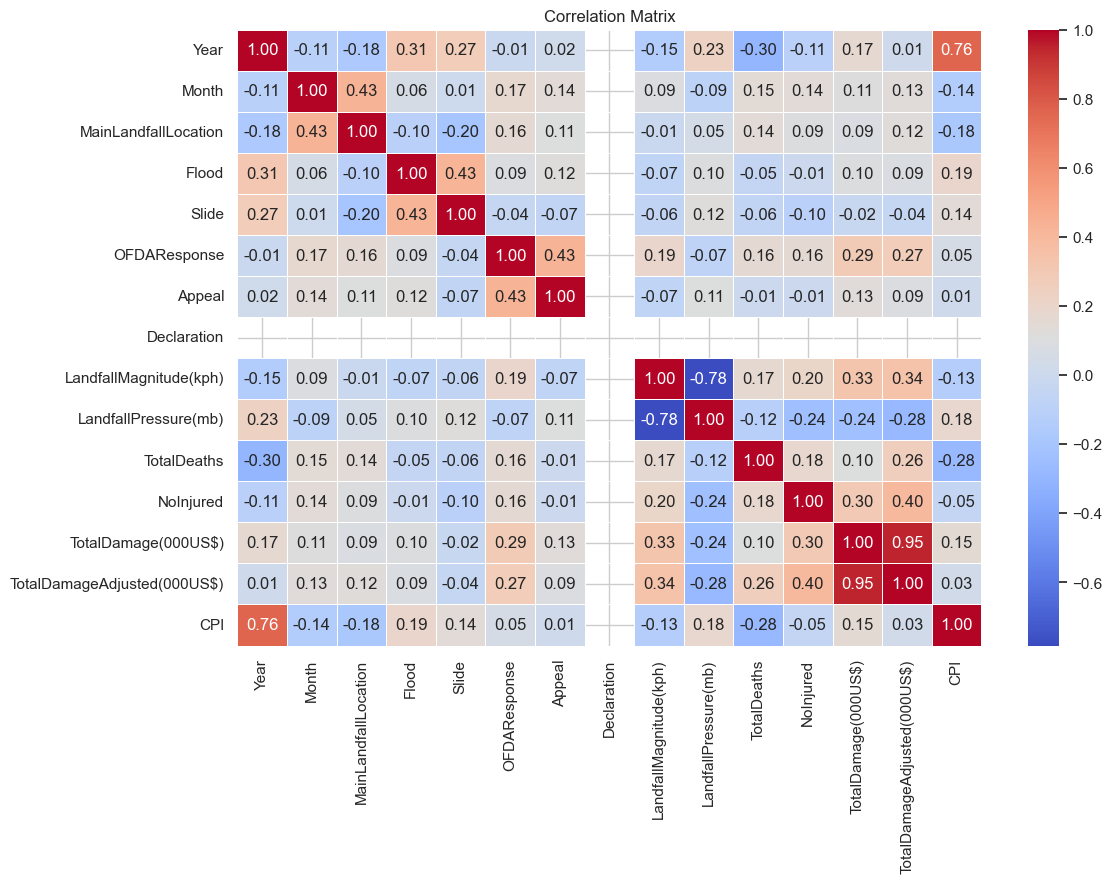

In [30]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals several interesting relationships:

- `Strong positive correlation (0.88) between Total Damage and Total Adjusted Damage`, as expected.
- `Moderate positive correlation (0.49) between Total Deaths and Number of Injured`.
- `Weak to moderate negative correlation (-0.34) between Landfall Pressure and Magnitude`, which aligns with meteorological principles (lower pressure often indicates stronger storms).
- `Weak positive correlations between Year and both damage metrics`, possibly indicating increasing storm intensity or higher-value infrastructure over time.
- `Surprisingly weak correlations between Landfall Magnitude and damage/casualty metrics`, suggesting other factors may be more influential in determining a storm's impact.


### 4. Typhoon frequency in terms of landfall time and location

In [31]:
x_label = ['NorthEast', 'NorthWest', 'Red River Delta', 'North Central Coast', 'South Central Coast', 'Central Highlands', 'SouthEast', 'Mekong River Delta']
map_dict = {i: name for i, name in enumerate(x_label, start=1)}

df['MainLandfallLocation'] = df['MainLandfallLocation'].map(map_dict)

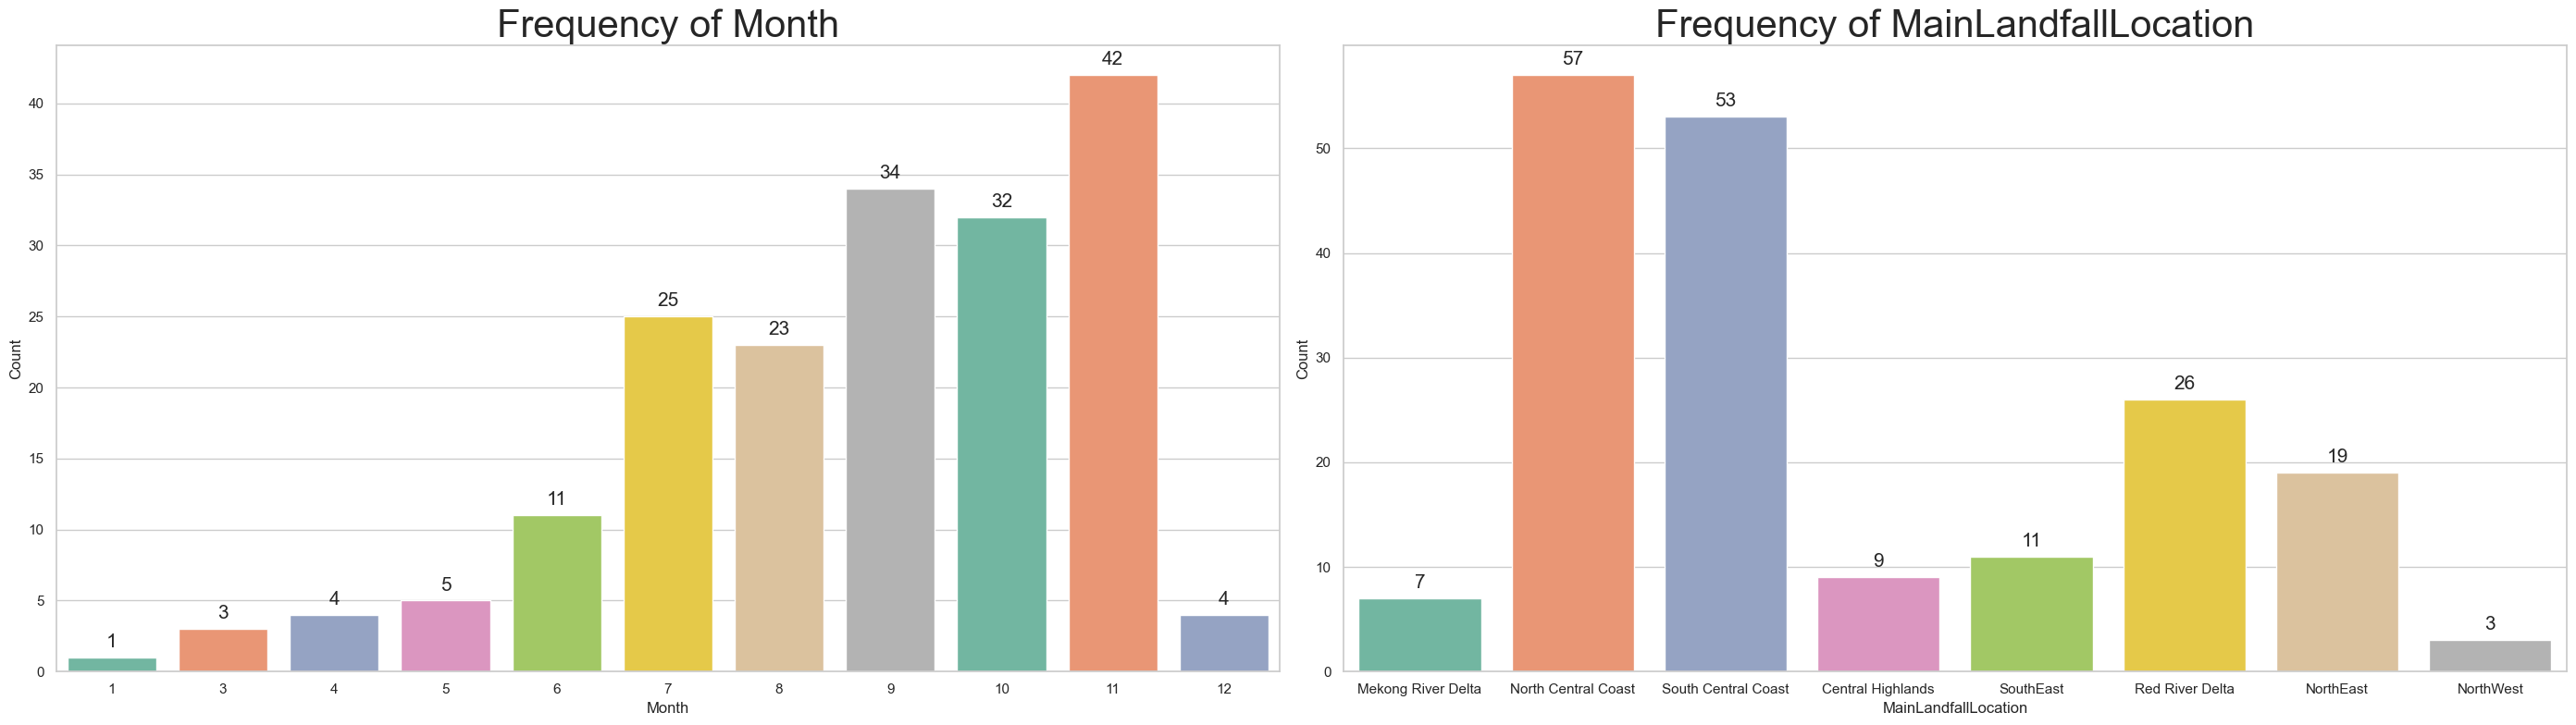

In [32]:
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = f"{y_value:.0f}"
        
        ax.annotate(label, (x_value, y_value), xytext=(0, spacing), fontsize=15, 
                    textcoords="offset points", ha='center', va='bottom')

categorical_columns = ['Month', 'MainLandfallLocation']

# Plotting the frequency of categorical variables
fig, axs = plt.subplots(1, 2, figsize=(28, 8))

# Plot each categorical column
for ax, col in zip(axs, categorical_columns):
    sns.countplot(x=df[col], ax=ax, palette='Set2', hue=df[col], legend=False)
    ax.set_title(f'Frequency of {col}', fontsize=30)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x')  
    add_value_labels(ax)  

plt.tight_layout()
plt.show()

The bar plots provide insights into the temporal and geographical distribution of storms:

- Month: 
  - `October and November` are the peak months for storm activity.
  - There's a `clear storm season` from `June to December`, with very few storms in the first five months of the year.

- Main Landfall Location:
  - `The North Central Coast` experiences the `highest frequency` of storm landfalls, followed by the South Central Coast.
  - `The Central Highlands and Southeast` regions have the `lowest frequency` of direct storm landfalls.
  - This distribution aligns with Vietnam's geographical vulnerability to Pacific typhoons.

In [33]:
df.to_csv(DATA_HEAD / "STORM_RAW_1.csv")